In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

In [3]:
pip install scikit-learn

In [51]:
data = pd.read_csv("/content/sample_data/data-historis-idx-shariah.csv")

In [52]:
data

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,23/05/2025,"225,76","224,92","226,07","224,51","10,24B","0,65%"
1,22/05/2025,"224,32","224,16","225,47","223,85","12,58B","0,34%"
2,21/05/2025,"223,55","222,88","224,20","222,65","12,97B","0,39%"
3,20/05/2025,"222,67","225,79","226,49","222,67","12,26B","-1,06%"
4,19/05/2025,"225,06","223,93","225,58","223,67","12,01B","0,83%"
...,...,...,...,...,...,...,...
1216,30/04/2020,"144,87","141,58","145,46","141,58","4,09B","2,32%"
1217,29/04/2020,"141,58","139,61","141,60","139,26","3,02B","1,42%"
1218,28/04/2020,"139,61","137,36","139,79","137,34","3,27B","1,64%"
1219,27/04/2020,"137,36","136,77","138,27","136,56","2,74B","0,44%"


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     1221 non-null   object
 1   Terakhir    1221 non-null   object
 2   Pembukaan   1221 non-null   object
 3   Tertinggi   1221 non-null   object
 4   Terendah    1221 non-null   object
 5   Vol.        1206 non-null   object
 6   Perubahan%  1221 non-null   object
dtypes: object(7)
memory usage: 66.9+ KB


In [54]:
#data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime format
#data.set_index('Date', inplace=True)  # Set 'Date' as the DataFrame index

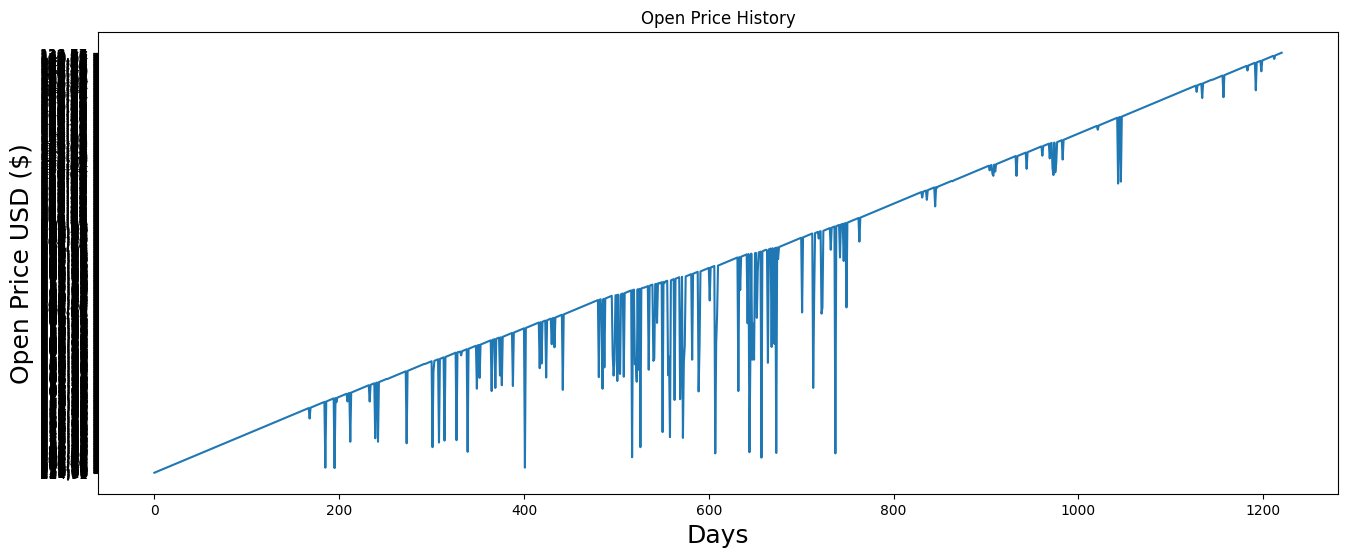

In [55]:
plt.figure(figsize=(16,6))
plt.title('Open Price History')
plt.plot(data['Pembukaan'])
plt.xlabel('Days', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

# Spliting Data as Train and Validation

In [56]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1221
Train data length : 855
Validation data lenth : 366


In [57]:
train_data = data[:length_train].iloc[:,:3]
train_data['Tanggal'] = pd.to_datetime(train_data['Tanggal'], format='%d/%m/%Y') # converting to date time object
train_data

,Tanggal,Terakhir,Pembukaan
0,2025-05-23,"225,76","224,92"
1,2025-05-22,"224,32","224,16"
2,2025-05-21,"223,55","222,88"
3,2025-05-20,"222,67","225,79"
4,2025-05-19,"225,06","223,93"
...,...,...,...
850,2021-11-08,"186,78","186,37"
851,2021-11-05,"186,01","186,24"
852,2021-11-04,"186,22","185,54"
853,2021-11-03,"184,75","183,32"


In [58]:
validation_data = data[length_train:].iloc[:,:3]
train_data['Tanggal'] = pd.to_datetime(train_data['Tanggal'], format='%d/%m/%Y') # converting to date time object
validation_data

,Tanggal,Terakhir,Pembukaan
855,01/11/2021,"184,87","186,05"
856,29/10/2021,"185,79","184,61"
857,28/10/2021,"184,28","186,99"
858,27/10/2021,"186,99","187,82"
859,26/10/2021,"187,48","187,14"
...,...,...,...
1216,30/04/2020,"144,87","141,58"
1217,29/04/2020,"141,58","139,61"
1218,28/04/2020,"139,61","137,36"
1219,27/04/2020,"137,36","136,77"


In [59]:
dataset_train = train_data.Pembukaan.values
dataset_train.shape

(855,)

In [60]:
# Change 1d array to 2d array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(855, 1)

# Normalization / Feature Scaling

In [61]:
# Gantilah 'Open' sesuai nama kolom yang kamu pakai
train_data['Pembukaan'] = train_data['Pembukaan'].str.replace(',', '.').astype(float)

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Ambil nilai dari kolom dan ubah ke array 2 dimensi
dataset_train = train_data['Pembukaan'].values.reshape(-1, 1)

# Scaling
scaler = MinMaxScaler()
dataset_train_scaled = scaler.fit_transform(dataset_train)


In [63]:
#Dataset values will be in between 0 and 1 after scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(855, 1)

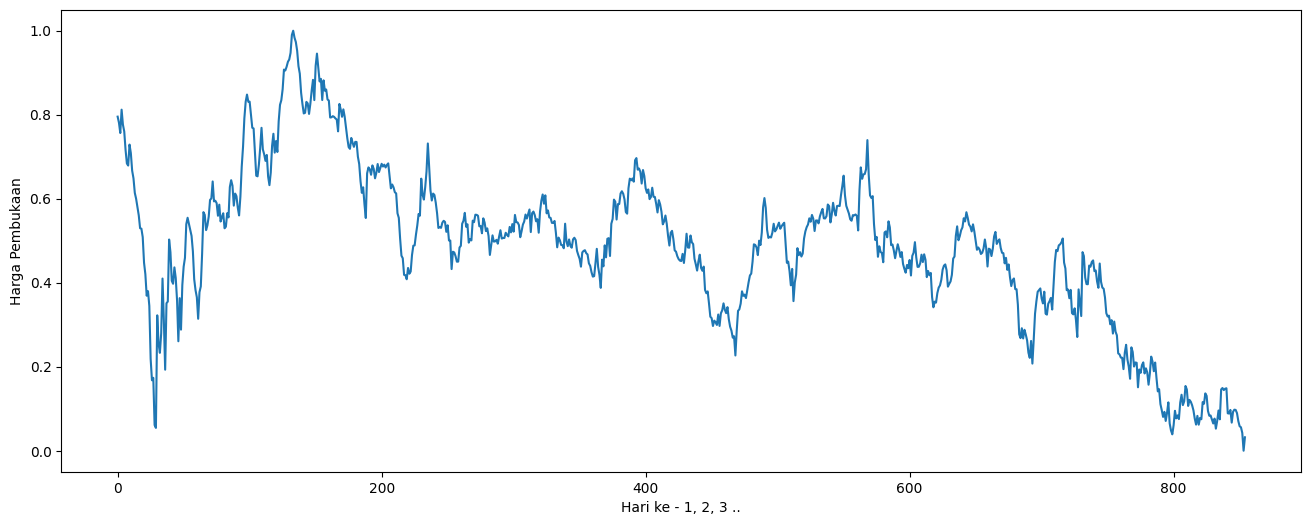

In [64]:
plt.subplots(figsize = (16,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Hari ke - 1, 2, 3 ..")
plt.ylabel("Harga Pembukaan")
plt.show()

# Creating X_train and y_train from Train data

In [65]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [66]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (805, 50)
Shape of y_train before reshape : (805,)


# Reshape

In [67]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (805, 50, 1)
Shape of y_train after reshape : (805, 1)


In [68]:
X_train[0]

array([[0.79541109],
       [0.78087954],
       [0.75640535],
       [0.81204589],
       [0.77648184],
       [0.76003824],
       [0.71625239],
       [0.68393881],
       [0.6789675 ],
       [0.72887189],
       [0.70860421],
       [0.6667304 ],
       [0.64856597],
       [0.61395793],
       [0.5998088 ],
       [0.58087954],
       [0.56042065],
       [0.52982792],
       [0.52868069],
       [0.50860421],
       [0.44760994],
       [0.42026769],
       [0.36902486],
       [0.37992352],
       [0.34474187],
       [0.21873805],
       [0.16768642],
       [0.17361377],
       [0.06118547],
       [0.0543021 ],
       [0.32237094],
       [0.25506692],
       [0.23307839],
       [0.27973231],
       [0.40994264],
       [0.31070746],
       [0.19292543],
       [0.35105163],
       [0.35525813],
       [0.50286807],
       [0.47265774],
       [0.40458891],
       [0.39751434],
       [0.43652008],
       [0.41166348],
       [0.35869981],
       [0.26061185],
       [0.363

In [69]:
y_train[0]

array([0.43804971])

Buat Model RNN

In [70]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.0027 - loss: 0.4954
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.0011 - loss: 0.2935
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.0014 - loss: 0.2723
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0011 - loss: 0.1900    
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.0010 - loss: 0.1848    
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0030 - loss: 0.1450
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.0015 - loss: 0.1154
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0010 - loss: 0.1041
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.0033 - loss: 0.0979
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 7.5284e-04 - loss: 0.0874
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0019 - loss: 0.0733
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy

Evaluasi Model

In [71]:
# Losses
history.history["loss"]

[0.42826196551322937,
 0.3099116086959839,
 0.26420995593070984,
 0.18678124248981476,
 0.1851825714111328,
 0.13968977332115173,
 0.1190749853849411,
 0.09899811446666718,
 0.09931450337171555,
 0.08467084914445877,
 0.07079175114631653,
 0.06521302461624146,
 0.0584343858063221,
 0.05779778212308884,
 0.04925702139735222,
 0.04110876843333244,
 0.03594249114394188,
 0.03223898634314537,
 0.035009004175662994,
 0.027777215465903282,
 0.02819065935909748,
 0.02631344459950924,
 0.02388196624815464,
 0.025395626202225685,
 0.023832444101572037,
 0.020220961421728134,
 0.02011967822909355,
 0.019937865436077118,
 0.017352985218167305,
 0.016175594180822372,
 0.015781039372086525,
 0.01541971880942583,
 0.013621622696518898,
 0.012859988957643509,
 0.01341798435896635,
 0.012987061403691769,
 0.011290015652775764,
 0.012966422364115715,
 0.0108379190787673,
 0.011045515537261963,
 0.010318943299353123,
 0.008997476659715176,
 0.010129120200872421,
 0.010082115419209003,
 0.008996862918138

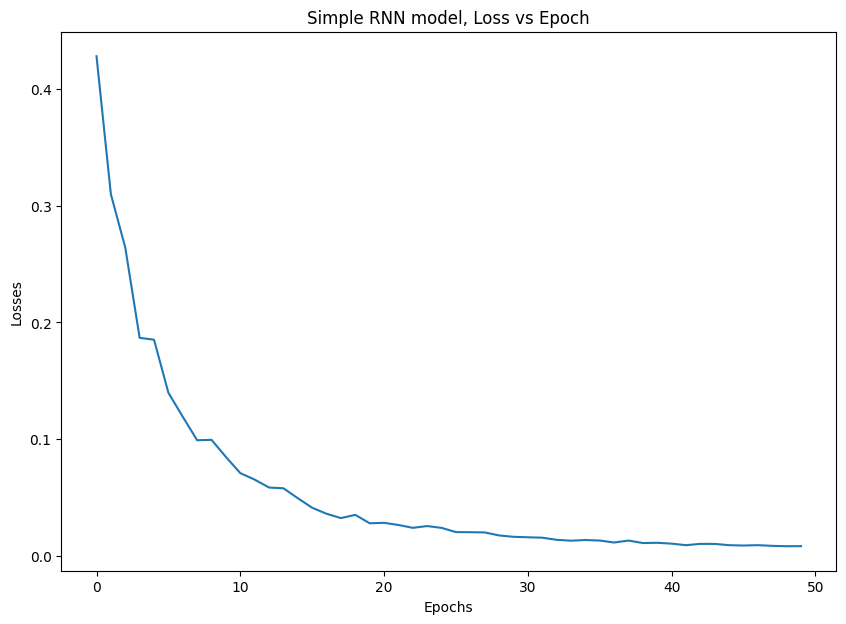

In [72]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

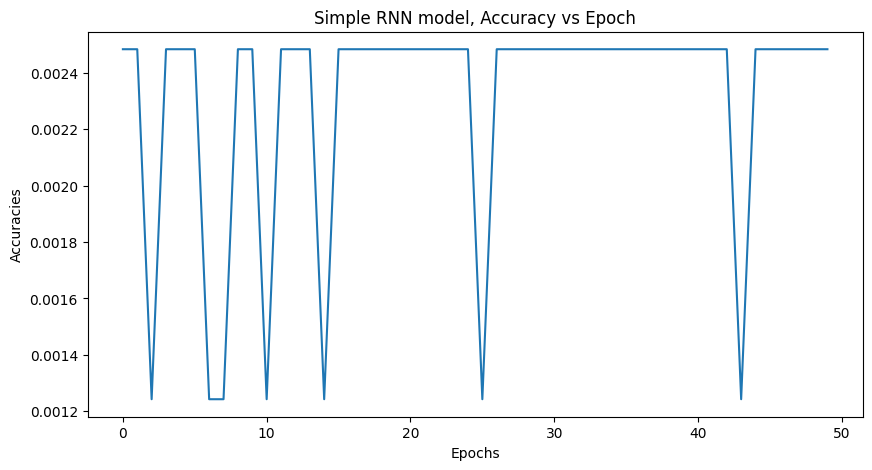

In [73]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

Prediksi Model dari Train data

In [74]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


(805, 1)

In [75]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(805, 1)

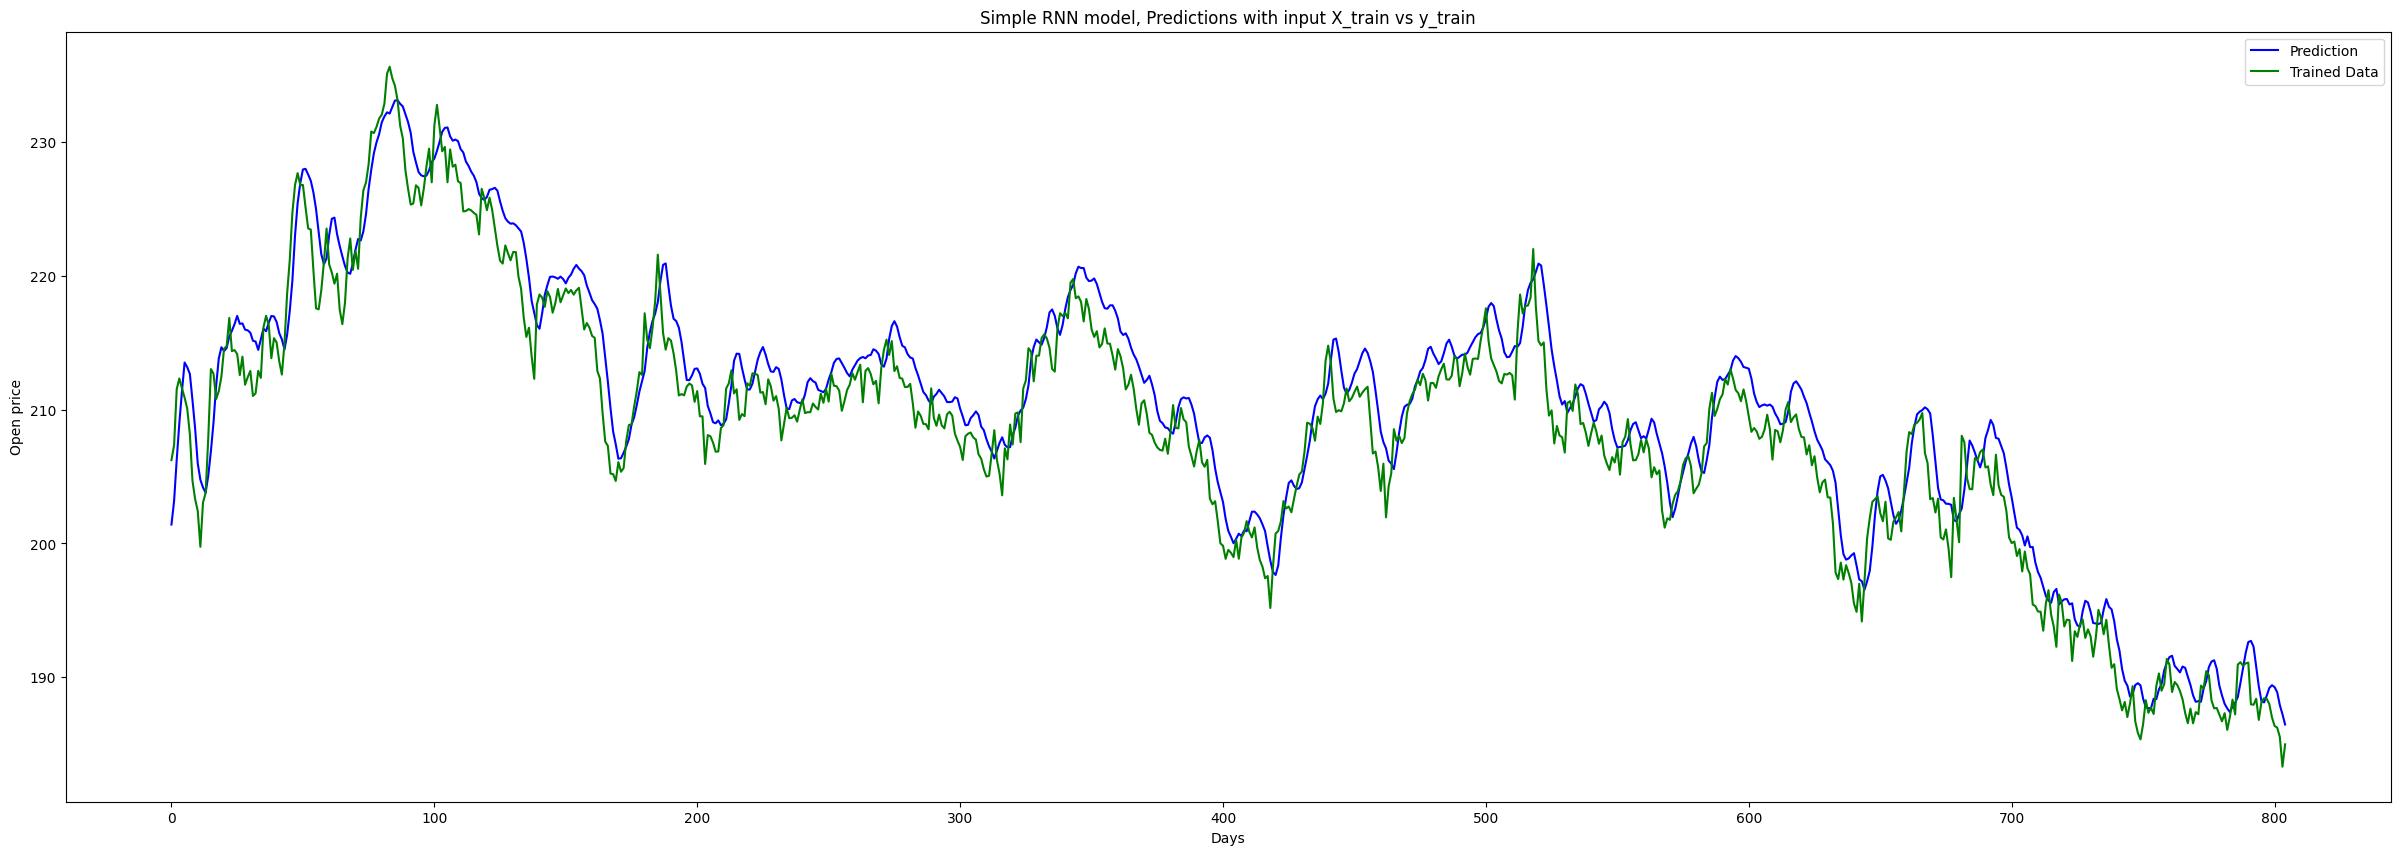

In [76]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "Prediction" )
plt.plot(y_train, color = "g", label = "Trained Data")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

# Creating Test Dataset from Validation Data

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit scaler ke data train
dataset_train = train_data['Pembukaan'].astype(float).values.reshape(-1, 1)
scaler.fit(dataset_train)  # <--- ini yang WAJIB dilakukan dulu



MinMaxScaler()

In [87]:
# Pastikan hanya ubah koma ke titik jika datanya masih string
if validation_data['Pembukaan'].dtype == 'object':
    validation_data['Pembukaan'] = validation_data['Pembukaan'].str.replace(',', '.').astype(float)



In [88]:
dataset_validation = validation_data['Pembukaan'].values.reshape(-1, 1)
scaled_dataset_validation = scaler.transform(dataset_validation)


In [89]:
dataset_validation = validation_data.Pembukaan.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (366, 1)


Creating X_test and y_test

In [90]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

Converting to array

In [91]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (316, 50)
Shape of y_test before reshape : (316,)


Reshape

In [92]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [93]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (316, 50, 1)
Shape of y_test after reshape : (316, 1)


# Model prediction with Validation Data

In [94]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Shape of y_pred_of_test : (316, 1)


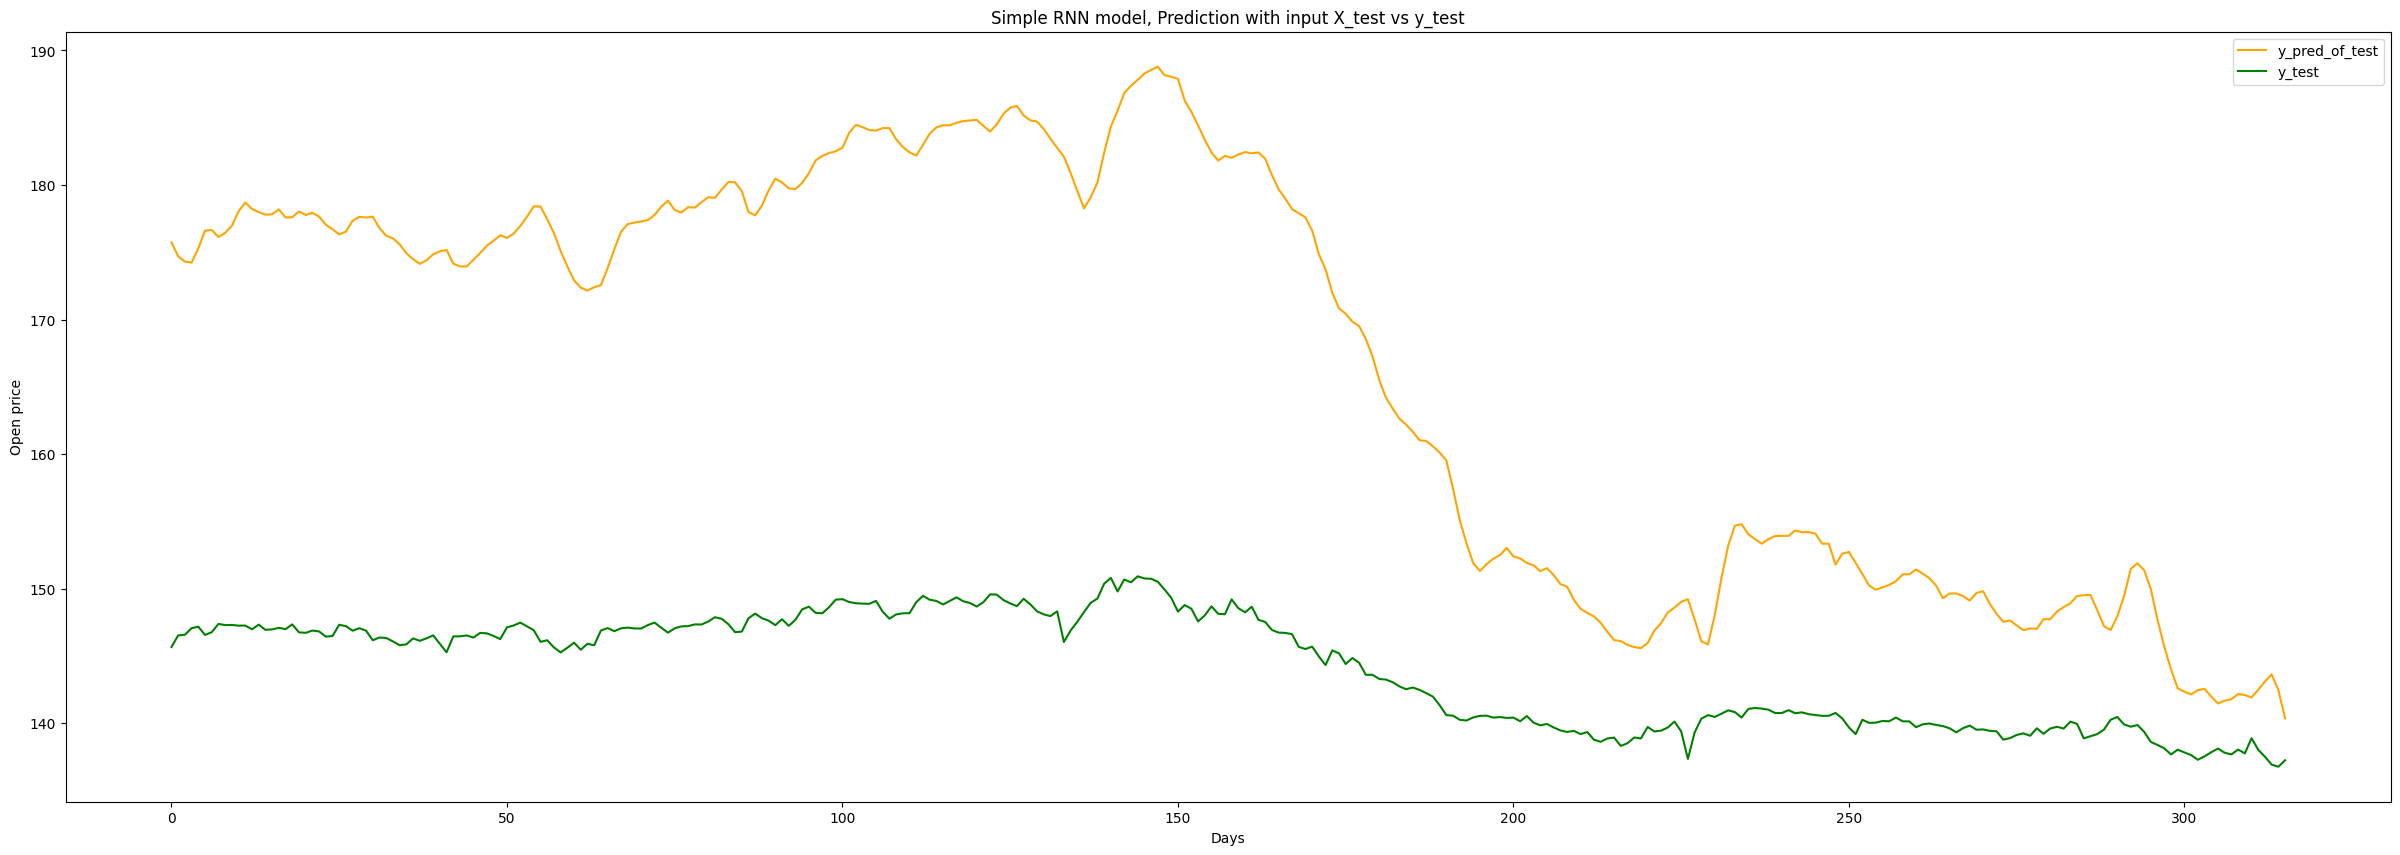

In [131]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

In [107]:
# Convert 'Tanggal' columns to datetime with proper format
train_data['Tanggal'] = pd.to_datetime(train_data['Tanggal'], dayfirst=True)  # If train dates also use DD/MM/YYYY
validation_data['Tanggal'] = pd.to_datetime(validation_data['Tanggal'], dayfirst=True)  # Explicitly handle day-month order

# Proceed with visualization code...

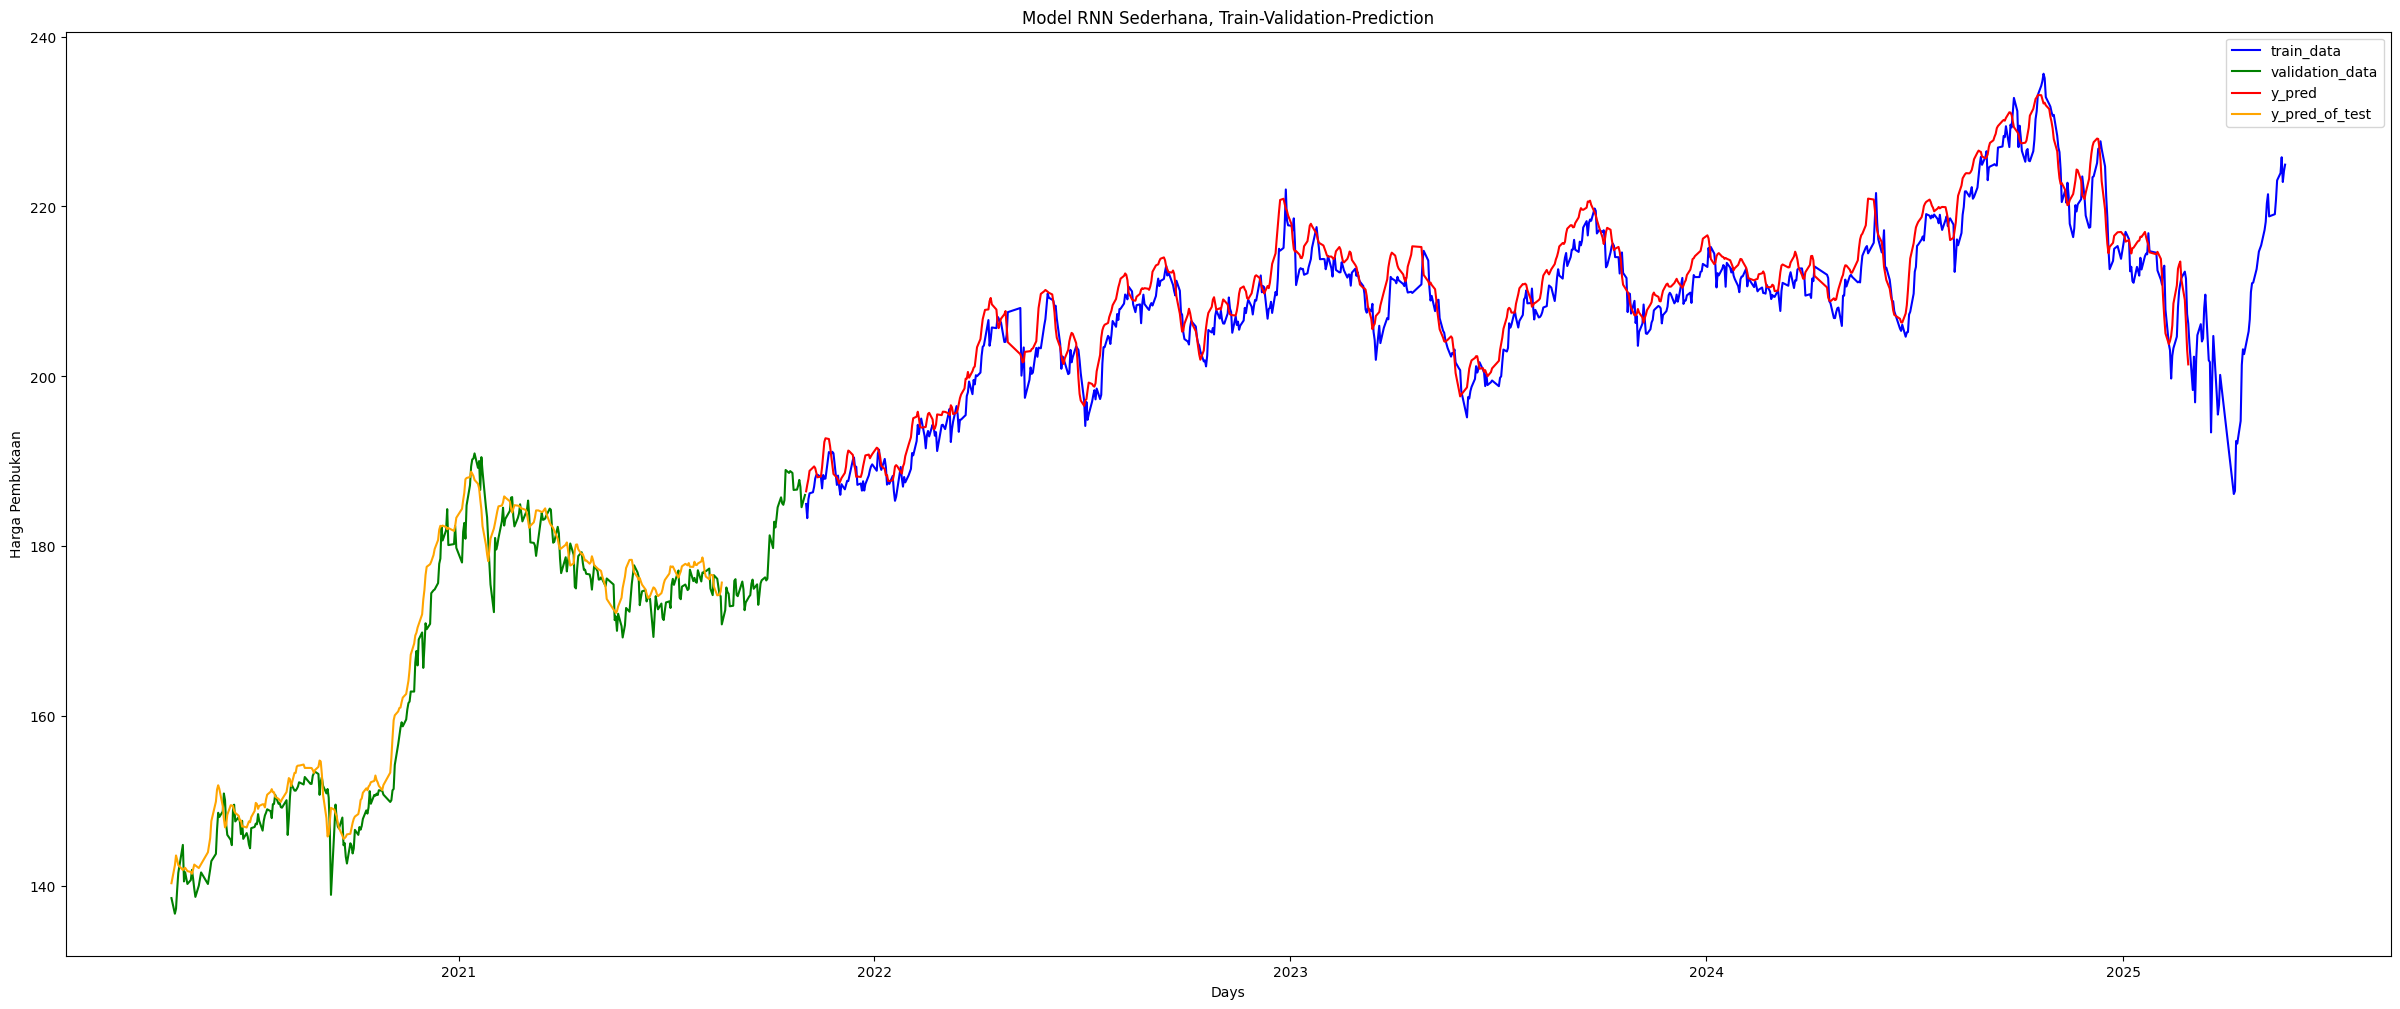

In [126]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Tanggal, train_data.Pembukaan, label = "train_data", color = "b")
plt.plot(validation_data.Tanggal, validation_data.Pembukaan, label = "validation_data", color = "g")
plt.plot(train_data.Tanggal.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Tanggal.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Harga Pembukaan")
plt.title("Model RNN Sederhana, Train-Validation-Prediction")
plt.legend()
plt.show()

# Creating LSTM Model

In [110]:
y_train = scaler.fit_transform(y_train)

In [111]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.0015 - loss: 0.0569
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.0044 - loss: 0.0042
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.0011 - loss: 0.0032
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.0014 - loss: 0.0034
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.0019 - loss: 0.0030
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.0027 - loss: 0.0030
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.0025 - loss: 0.0023
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.0030 - loss: 0.0020
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.0066 - loss: 0.0019
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.0019 - loss: 0.0016


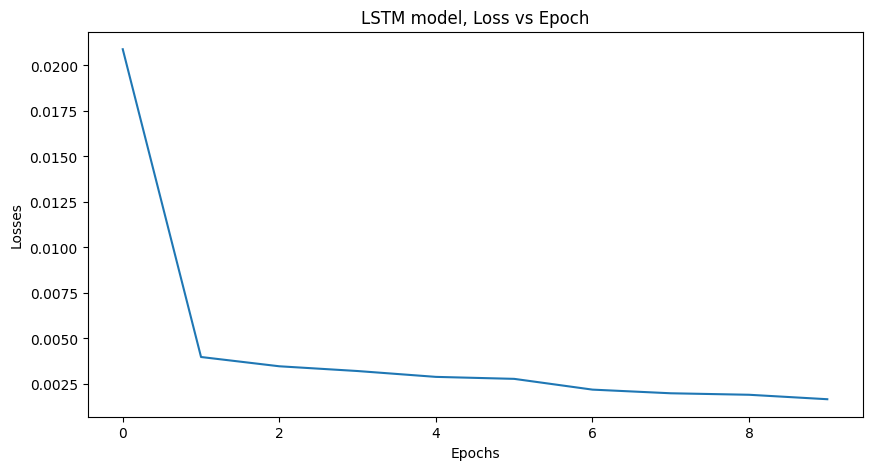

In [112]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Model LSTM, Loss vs Epoch")
plt.show()

# Model Prediction using Training Data

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


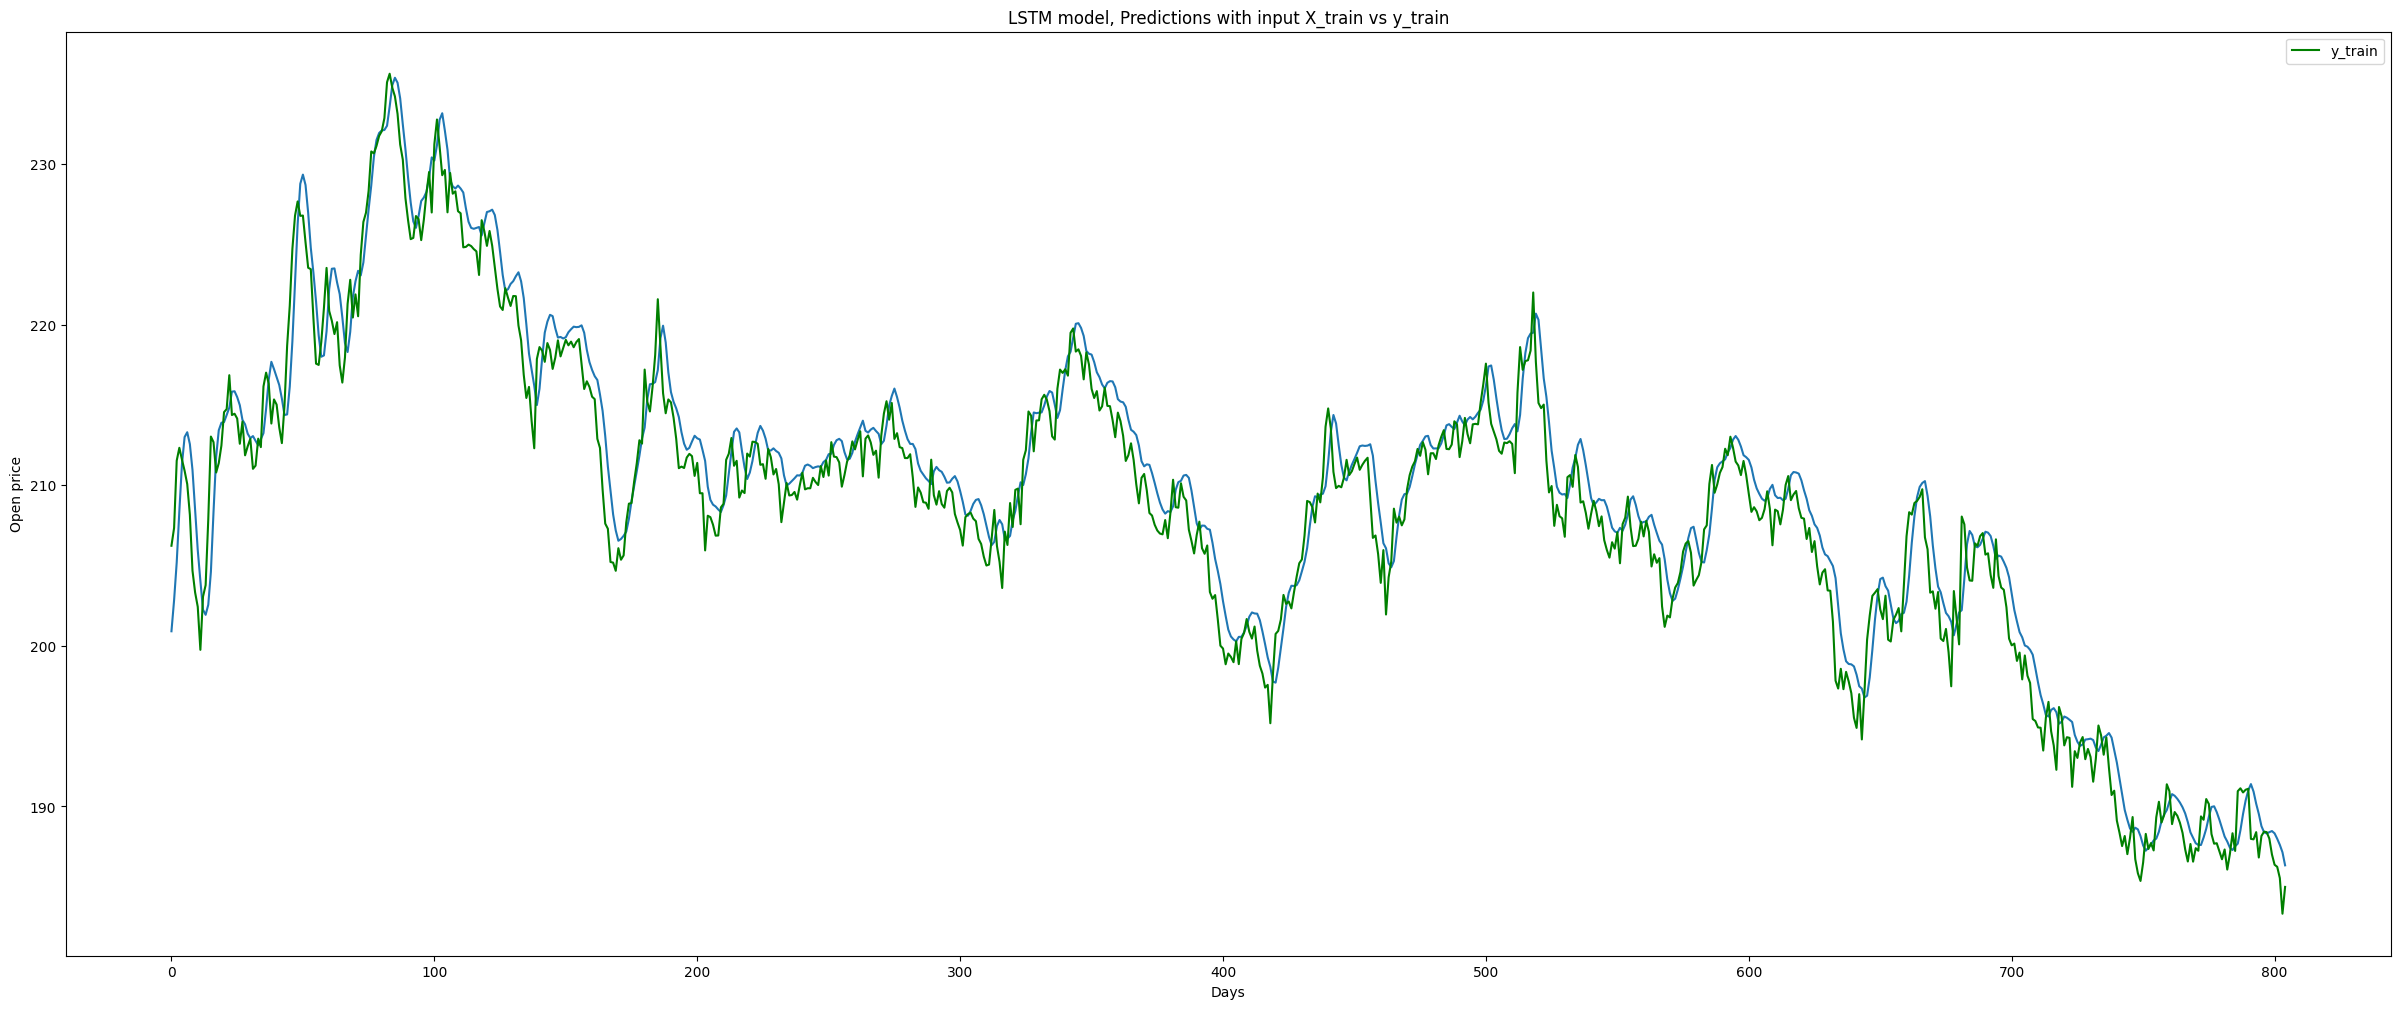

In [113]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_train)))
plt.plot(scaler.inverse_transform(y_train), label = "y_train", color = "g")
plt.xlabel("Hari")
plt.ylabel("Harga Pembukaan")
plt.title("Model LSTM, Prediksi dengan input X_train vs y_train")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


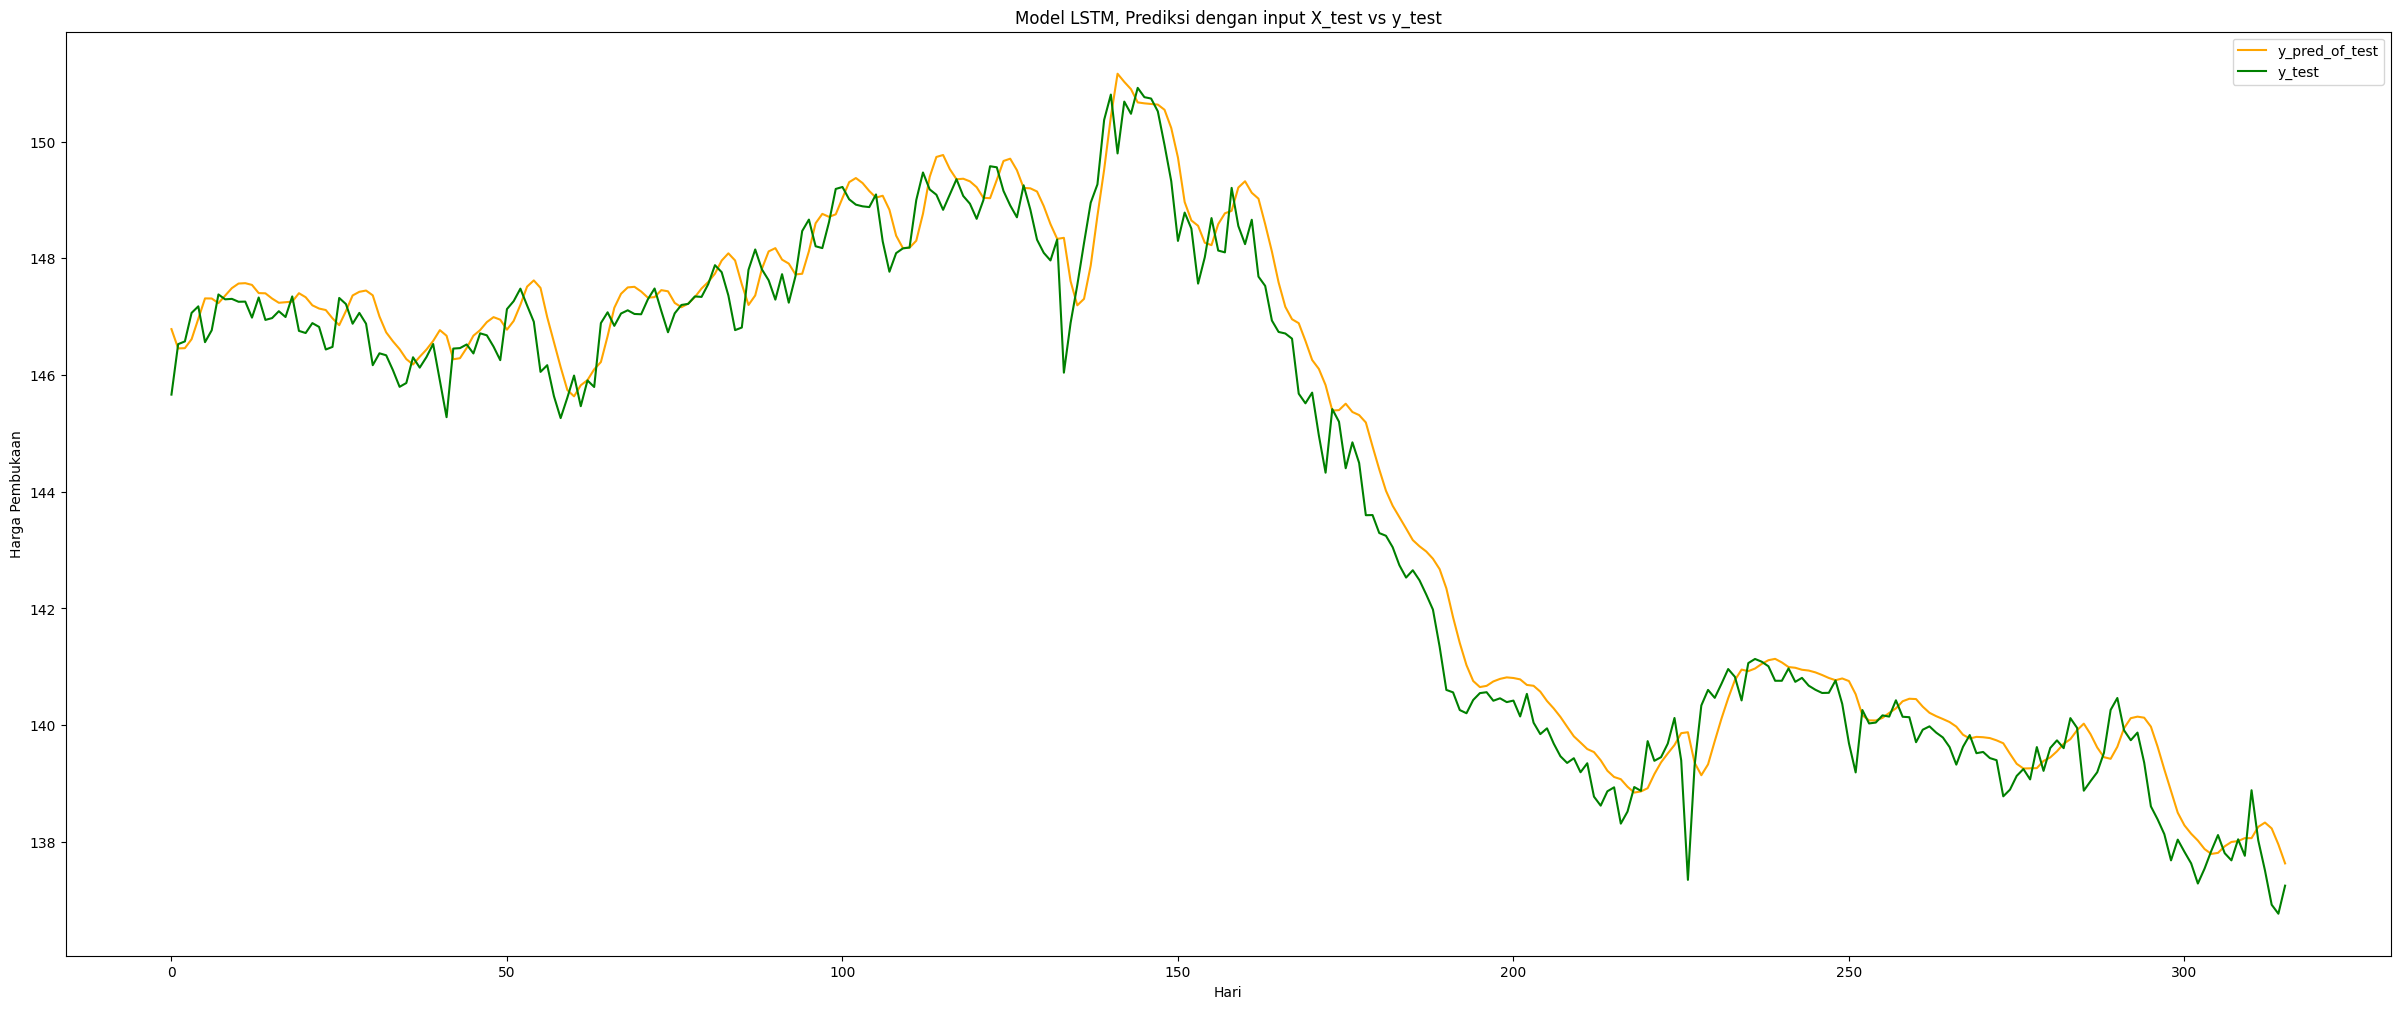

In [125]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Hari")
plt.ylabel("Harga Pembukaan")
plt.title("Model LSTM, Prediksi dengan input X_test vs y_test")
plt.legend()
plt.show()

# Future Price Prediction

In [115]:
data.iloc[-1]

,1220
Tanggal,24/04/2020
Terakhir,"136,77"
Pembukaan,"138,61"
Tertinggi,"139,17"
Terendah,"136,72"
Vol.,"3,31B"
Perubahan%,"-1,33%"


In [118]:
# Ubah koma menjadi titik untuk format desimal
data['Pembukaan'] = data['Pembukaan'].str.replace(',', '.').astype(float)

In [119]:
X_input = data.iloc[-time_step:].Pembukaan.values
X_input = scaler.fit_transform(X_input.reshape(-1,1))
X_input = np.reshape(X_input, (1, 50, 1))

In [121]:
X_input = data.iloc[-time_step:].Pembukaan.values
X_input = scaler.fit_transform(X_input.reshape(-1,1))
X_input = np.reshape(X_input, (1,50,1))
print("Bentuk X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.69116608],
        [0.77385159],
        [0.82826855],
        [0.74416961],
        [0.74982332],
        [0.72155477],
        [0.71166078],
        [0.54416961],
        [0.57526502],
        [0.63886926],
        [0.67067138],
        [0.62261484],
        [0.77243816],
        [0.66219081],
        [0.76819788],
        [0.80353357],
        [0.76749117],
        [0.90671378],
        [0.8614841 ],
        [0.57031802],
        [0.61413428],
        [0.65583039],
        [0.74558304],
        [0.94487633],
        [1.        ],
        [0.85017668],
        [0.80424028],
        [0.83957597],
        [0.70035336],
        [0.4975265 ],
        [0.43745583],
        [0.36890459],
        [0.24734982],
        [0.3434629 ],
        [0.2869258 ],
        [0.23321555],
        [0.13992933],
        [0.20918728],
        [0.29116608],
        [0.36466431],
        [0.28056537],
        [0.24734982],
        [0.34487633],
        [0.26855124],
        [0.57243816],
        [0

In [132]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("RNN Sederhana, Prediksi harga pembukaan untuk 24/05/2020 :", simple_RNN_prediction[0,0])
print("Prediksi LSTM, Prediksi harga pembukaan untuk 24/05/2020 :", LSTM_prediction[0,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
RNN Sederhana, Prediksi harga pembukaan untuk 24/05/2020 : 138.45107
Prediksi LSTM, Prediksi harga pembukaan untuk 24/05/2020 : 138.60875
